     Voltage (p.u.)  Angle (°)
0          0.990955  -4.288415
1          1.042170  -1.279609
2          1.018483  10.144378
3          1.016622  -2.206538
4          0.982516  -4.407322
5          1.044047  -0.193175
6          1.037812   2.367126
7          1.001922  -4.614260
8          0.995477  -4.335714
9          1.015010  -4.133666
10         1.008773  -3.927826
11         1.022141   3.638514
12         0.994294  -3.713704
13         1.041019   1.980756
14         1.013956   0.393381
15         1.019217   3.048726
16         1.017010   2.141950
17         1.032828  -1.182149
18         1.038513   0.477904
19         1.032735   8.530708
20         1.020350   4.185654
21         1.030178  -1.865820
22         1.039052   0.523505
23         1.042293   0.830588
24         1.033923  -2.820391
25         1.033009   1.748559
26         1.005636  -2.585189
27         1.005485  -4.484210
28         1.013166   2.361821
29         1.027758  11.709778
30         1.029106   2.524184
31      

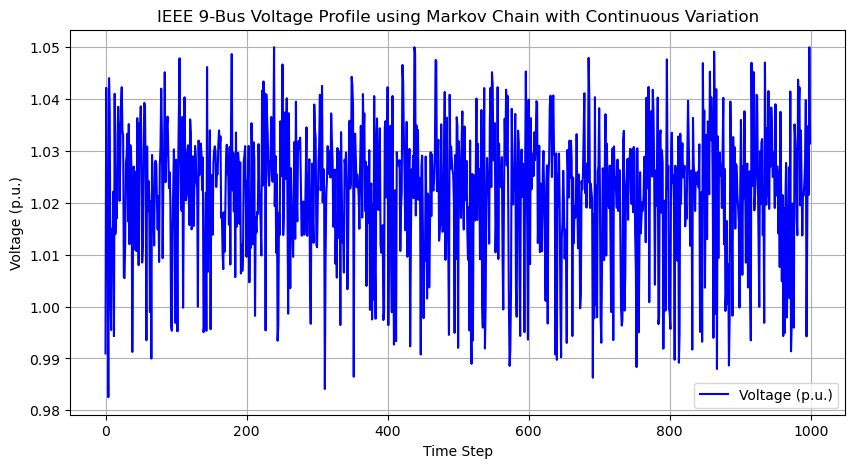

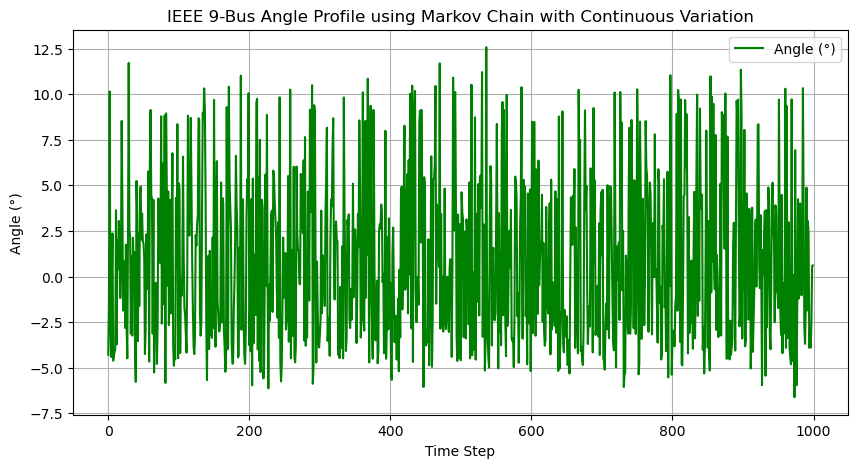

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given 9 pairs of Voltage (p.u.) and Angle (°)
voltage_angle_pairs = np.array([
    (1.04, 0.0), (1.025, 9.3), (1.025, 4.7), (1.026, -2.2),
    (0.996, -4.0), (1.013, -3.7), (1.026, 3.7), (1.016, 0.7), (1.032, 2.0)
])

num_states = len(voltage_angle_pairs)

# Define a Random Transition Matrix (Each Row Sums to 1)
transition_matrix = np.array([
    [0.2, 0.15, 0.1, 0.1, 0.15, 0.1, 0.1, 0.05, 0.05],
    [0.1, 0.2, 0.15, 0.1, 0.15, 0.1, 0.1, 0.05, 0.05],
    [0.1, 0.1, 0.2, 0.15, 0.1, 0.15, 0.1, 0.05, 0.05],
    [0.1, 0.1, 0.15, 0.2, 0.1, 0.15, 0.1, 0.05, 0.05],
    [0.15, 0.1, 0.1, 0.1, 0.2, 0.1, 0.15, 0.05, 0.05],
    [0.1, 0.15, 0.1, 0.15, 0.1, 0.2, 0.1, 0.05, 0.05],
    [0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.2, 0.05, 0.05],
    [0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.2],
    [0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.2]
])

# Normalize Transition Matrix
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Function to Generate Data Using Markov Chain with Variations
def generate_continuous_markov_data(pairs, transition_matrix, num_samples=1000, voltage_std=0.005, angle_std=1.0):
    data = []
    current_index = np.random.choice(range(num_states))  # Random Initial State
    
    for _ in range(num_samples):
        # Get current state (voltage, angle)
        voltage, angle = pairs[current_index]

        # Add small random variation to voltage and angle
        voltage += np.random.normal(0, voltage_std)  # Small voltage variation
        angle += np.random.normal(0, angle_std)  # Small angle variation

        # Ensure voltage stays in a reasonable range (Optional, for stability)
        voltage = max(0.95, min(1.05, voltage))  

        # Append new (V, θ) values
        data.append((voltage, angle))

        # Move to the next state based on Markov transition
        current_index = np.random.choice(range(num_states), p=transition_matrix[current_index])
    
    return np.array(data)

# Generate 1000 Samples with Variations
num_samples = 1000
synthetic_data = generate_continuous_markov_data(voltage_angle_pairs, transition_matrix, num_samples)

# Convert Data to DataFrame
df = pd.DataFrame(synthetic_data, columns=["Voltage (p.u.)", "Angle (°)"])

# Display ALL 1000 Rows
pd.set_option("display.max_rows", None)  # Enable full display
print(df)

# Save to CSV
df.to_csv("synthetic_voltage_angle_data_continuous.csv", index=False)

# Plot Voltage Profile
plt.figure(figsize=(10, 5))
plt.plot(df["Voltage (p.u.)"], label="Voltage (p.u.)", color="blue")
plt.xlabel("Time Step")
plt.ylabel("Voltage (p.u.)")
plt.title("IEEE 9-Bus Voltage Profile using Markov Chain with Continuous Variation")
plt.legend()
plt.grid()
plt.show()

# Plot Angle Profile
plt.figure(figsize=(10, 5))
plt.plot(df["Angle (°)"], label="Angle (°)", color="green")
plt.xlabel("Time Step")
plt.ylabel("Angle (°)")
plt.title("IEEE 9-Bus Angle Profile using Markov Chain with Continuous Variation")
plt.legend()
plt.grid()
plt.show()


      Voltage (p.u.)  Angle (°)
0           1.100000  -2.920018
1           1.073977  -3.241306
2           1.089380   0.418675
3           1.085484  -1.642553
4           1.084144   1.133188
5           1.100000  -3.955331
6           1.084418   5.588483
7           0.900000  -4.308391
8           1.075137   3.086126
9           0.900000  -4.592759
10          1.096504   2.110952
11          1.077567  -1.197467
12          0.900000  -1.893167
13          1.076282   5.032649
14          1.100000  -4.047399
15          1.093028   1.470336
16          1.053443   2.104270
17          1.084366   4.521113
18          1.077726   4.472849
19          1.077073  -4.543015
20          1.078148   9.021338
21          1.100000  -3.339581
22          1.060578   0.863443
23          1.090806  -0.687292
24          1.090582   0.094136
25          1.079111  10.222013
26          1.087586   4.476139
27          1.079354   2.852195
28          0.900000  -4.654213
29          1.059718   2.615534
30      

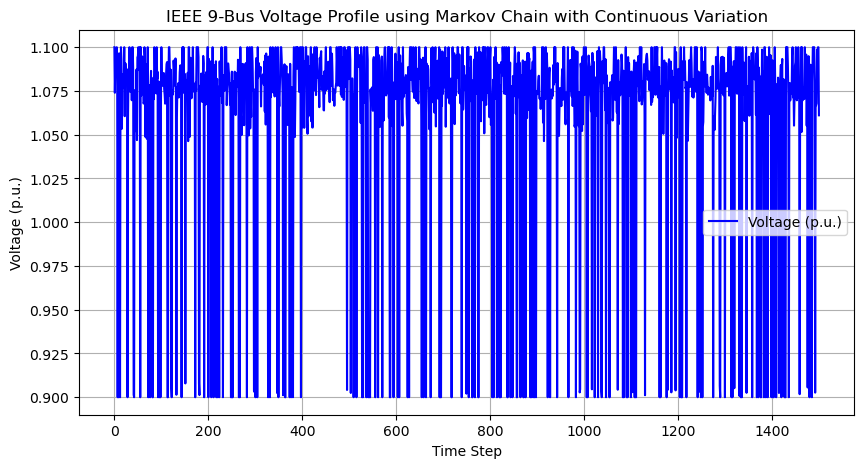

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given 9 pairs of Voltage (p.u.) and Angle (°)
voltage_angle_pairs = np.array([
    (1.09, 0.0), (1.075, 9.3), (1.075, 4.7), (1.076, -2.2),
    (0.896, -4.0), (1.113, -3.7), (1.086, 3.7), (1.056, 0.7), (1.092, 2.0)
])

num_states = len(voltage_angle_pairs)

# Define a Random Transition Matrix (Each Row Sums to 1)
transition_matrix = np.array([
    [0.2, 0.15, 0.1, 0.1, 0.15, 0.1, 0.1, 0.05, 0.05],
    [0.1, 0.2, 0.15, 0.1, 0.15, 0.1, 0.1, 0.05, 0.05],
    [0.1, 0.1, 0.2, 0.15, 0.1, 0.15, 0.1, 0.05, 0.05],
    [0.1, 0.1, 0.15, 0.2, 0.1, 0.15, 0.1, 0.05, 0.05],
    [0.15, 0.1, 0.1, 0.1, 0.2, 0.1, 0.15, 0.05, 0.05],
    [0.1, 0.15, 0.1, 0.15, 0.1, 0.2, 0.1, 0.05, 0.05],
    [0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.2, 0.05, 0.05],
    [0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.2],
    [0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.2]
])

# Normalize Transition Matrix
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Function to Generate Data Using Markov Chain with Variations
def generate_continuous_markov_data(pairs, transition_matrix, num_samples=1000, voltage_std=0.005, angle_std=1.0):
    data = []
    current_index = np.random.choice(range(num_states))  # Random Initial State
    
    for _ in range(num_samples):
        # Get current state (voltage, angle)
        voltage, angle = pairs[current_index]

        # Add small random variation to voltage and angle
        voltage += np.random.normal(0, voltage_std)  # Small voltage variation
        angle += np.random.normal(0, angle_std)  # Small angle variation

        # Ensure voltage stays in a reasonable range (Optional, for stability)
        voltage = max(0.90, min(1.10, voltage))  

        # Append new (V, θ) values
        data.append((voltage, angle))

        # Move to the next state based on Markov transition
        current_index = np.random.choice(range(num_states), p=transition_matrix[current_index])
    
    return np.array(data)

# Generate 1000 Samples with Variations
num_samples = 1500
synthetic_data = generate_continuous_markov_data(voltage_angle_pairs, transition_matrix, num_samples)

# Convert Data to DataFrame
df = pd.DataFrame(synthetic_data, columns=["Voltage (p.u.)", "Angle (°)"])

# Display ALL 1000 Rows
pd.set_option("display.max_rows", None)  # Enable full display
print(df)

# Save to CSV
df.to_csv("synthetic_voltage_angle_data_continuous.csv", index=False)

# Plot Voltage Profile
plt.figure(figsize=(10, 5))
plt.plot(df["Voltage (p.u.)"], label="Voltage (p.u.)", color="blue")
plt.xlabel("Time Step")
plt.ylabel("Voltage (p.u.)")
plt.title("IEEE 9-Bus Voltage Profile using Markov Chain with Continuous Variation")
plt.legend()
plt.grid()
plt.show()


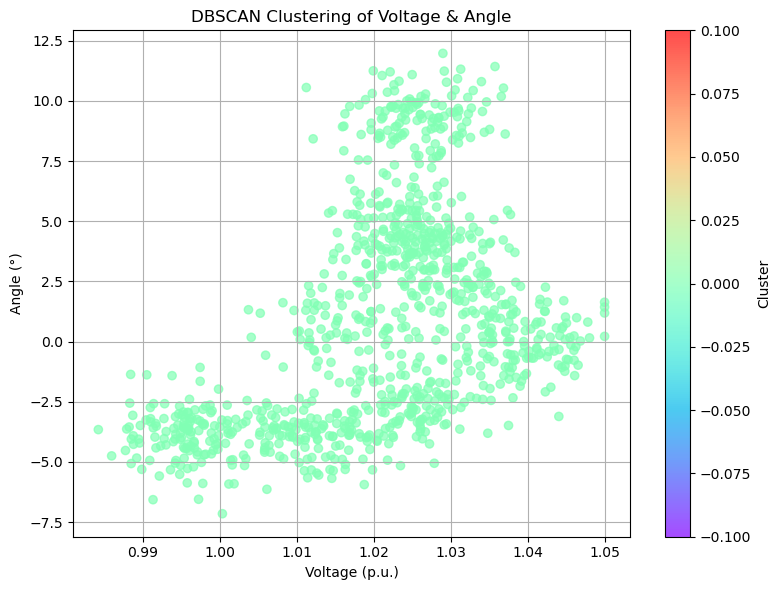

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load dataset from Excel
file_path = "C:/Users/randh/OneDrive/Documents/internship/bks sir/1000_data.xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Extract Voltage and Angle columns
X = data[["Voltage", "Angle"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Plot the clustering result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data["Voltage"], data["Angle"], c=data["Cluster_DBSCAN"], cmap="rainbow", alpha=0.7)
plt.xlabel("Voltage (p.u.)")
plt.ylabel("Angle (°)")
plt.title("DBSCAN Clustering of Voltage & Angle")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()
